# Problem 1: Simulating stochastic processes

## a)
For an exponential distribution with the form $p(r)=\lambda e^{-\lambda r}$ for $r\geq 0$, the corresponding cdf, as shown in the example 1.13, is $C(r)=1-e^{-\lambda r}$. If follows that $C^{-1}(u)=-\frac{1}{\lambda}\log(1-u)$. According to the fundamental theorem of simulation, we first sample $u$ from $\text{Uniform}_{[0,1]}$, then $r$ is calculated using $r=C^{-1}(u)$.

In [1]:
function exprnd(λ, size...)
    u = rand(size...); # Generate u with some give dimension.
    return @. -1/λ * log(1 - u) # Calculate r.
end;

## b)
Now we draw 100 samples from the same exponential distribution and histogram the data to form the pdf.

In [2]:
λ = 1;
N = 100;
r = exprnd(λ, N); # Call the functions we defined in a).

Now the result can be tested via some visualization.

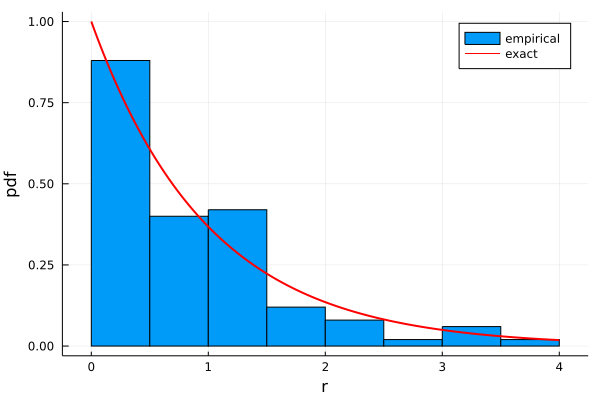

In [3]:
using Plots, StatsBase, LinearAlgebra
pdf = normalize(fit(Histogram, r), mode=:pdf)
plot(pdf, label = "empirical")
x = range(0, stop = maximum(pdf.edges...), length = 1000);
plot!(x, λ*exp.(-λ .* x), label = "exact", linewidth = 2, linecolor = :red)
xaxis!("r")
yaxis!("pdf")

The cdf plots can either be made using the pdf histogram above, or they can be constructed directly. Here, we would show both ways.

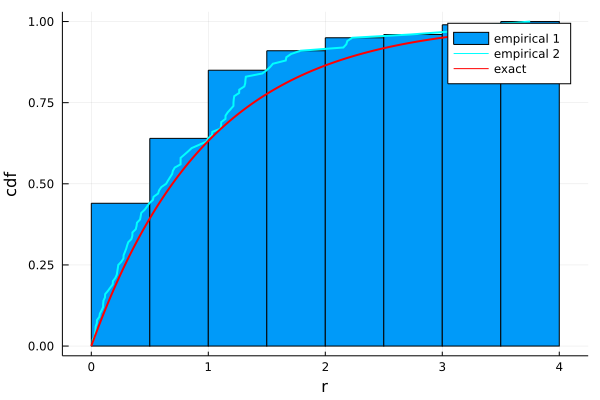

In [4]:
# Based on the pdf.
width = pdf.edges[1][2] - pdf.edges[1][1];
cdf_heights = cumsum(pdf.weights) * width;
midpoints = (pdf.edges[1][1:end-1] + pdf.edges[1][2:end])/2;
cdf = bar(midpoints, cdf_heights, label = "empirical 1", bar_width = width)
x = range(0, stop = maximum(pdf.edges...), length = 1000);
# Calculated directly.
r_sorted = sort(r);
plot!(r_sorted, (1:N)/N, label = "empirical 2", linewidth = 2, linecolor = :cyan)
plot!(x, 1 .- exp.(-λ .* x), label = "exact", linewidth = 2, linecolor = :red)
xaxis!("r")
yaxis!("cdf")

## c)

In [5]:
using LsqFit
@. model_pdf(r, λ) = λ*exp(-r*λ);
@. model_cdf(r, λ) = 1 - exp(-r*λ);

In [7]:
@time fit_pdf = curve_fit(model_pdf, midpoints, pdf.weights, [0.5]);
fit_pdf.param

  0.000073 seconds (164 allocations: 17.344 KiB)


1-element Vector{Float64}:
 1.134849536337684

In [9]:
@time fit_cdf1 = curve_fit(model_cdf, midpoints, cdf_heights, [0.5]);
fit_cdf1.param # Get λ from fitting cdf 1.

  0.000092 seconds (232 allocations: 24.594 KiB)


1-element Vector{Float64}:
 1.57449276058414

In [11]:
@time fit_cdf2 = curve_fit(model_cdf, r_sorted, (1:N)/N, [0.5]);
fit_cdf2.param # Get λ from fitting cdf 2.

  0.000145 seconds (174 allocations: 78.391 KiB)


1-element Vector{Float64}:
 1.1526397458880775

In [13]:
@time mean(r) # Get λ from calculating the mean of all samples.

  0.000005 seconds (1 allocation: 16 bytes)


0.8475500143040106

Taking the mean, in this problem, is a much more efficient choice for estimating the rate than all the fitting methods.

# Problem 2: 